**Example 1**



**Elasto-Plasticity with Isotropic and Kinematic Hardening**

This script simulates elasto-plastic behavior with both **isotropic** and **kinematic hardening** models. It utilizes the `elastoplasticity` package, which provides implementations for these models.

**1. Parameters**  
We define the following material properties:
- \( E = 1000 \) → Young’s modulus
- \( H = 111 \) → Hardening modulus
- \( Y = 10 \) → Initial yield stress (\( Y0 \) for isotropic hardening)

**2. Models Used**
- `ElastoPlasticIsoHard` → Isotropic hardening model
- `ElastoPlasticKinematicHard` → Kinematic hardening model

**3. Strain Input**  
A cyclic strain path is applied to observe the material response. The strain array is composed of several loading and unloading segments, including:
- Loading up to \( \varepsilon = 0.02 \), unloading to zero
- Reverse loading to \( \varepsilon = -0.02 \), returning to zero
- A larger cycle with \( \varepsilon = 0.04 \)

**4. Plotting Results**  
- `ep.plot_total_applied_strain(epsilon_arr, fig_name_with_path)` → Visualizes the total applied strain path.
- `ep_iso.plot_stress_strain_curve(epsilon_arr, sigma0, fig_name_with_path)` → Plots the stress-strain response for isotropic hardening.
- `ep_k.plot_stress_strain_curve(epsilon_arr, sigma0, fig_name_with_path)` → Plots the stress-strain response for kinematic hardening.

These plots help visualize the difference in stress-strain behavior under different hardening assumptions.

---
**Run the script to generate the stress-strain curves and compare the effects of isotropic vs. kinematic hardening.**


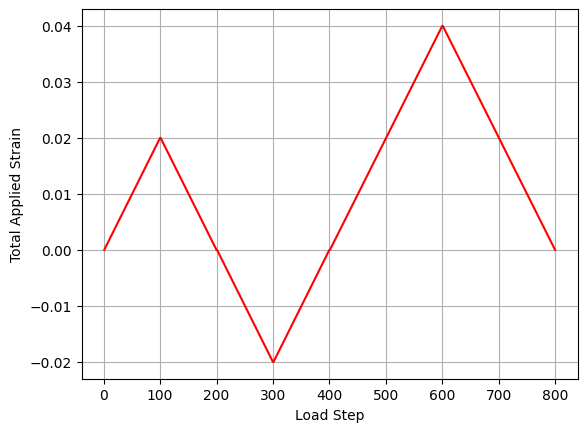

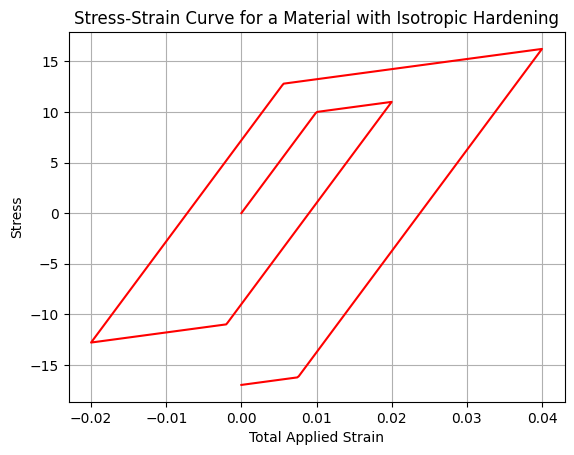

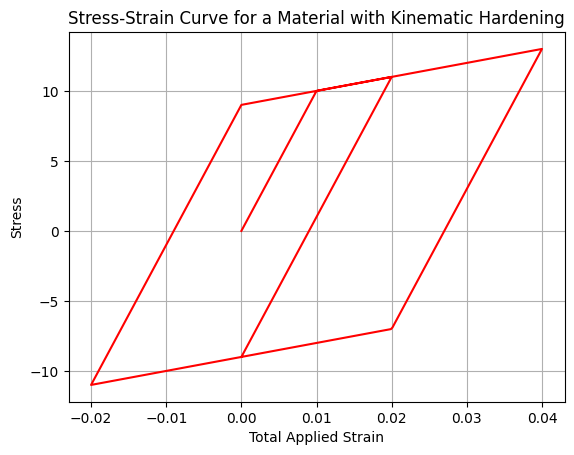

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from elastoplasticity import elasto_plasticity as ep
import os

E, H, Y= 1000, 111, 10
Y0 = Y
ep_iso = ep.ElastoPlasticIsoHard( E, H, Y0)
ep_k = ep.ElastoPlasticKinematicHard( E, H, Y)
sigma0 = 0
epsilon_arr = np.concatenate( (np.linspace(0, 0.02, 100), np.linspace(0.02, 0, 100), np.linspace(0, -0.02, 100), np.linspace(-0.02, 0, 100), np.linspace(0, 0.04, 200), np.linspace(0.04, 0, 200)))

exmaple_number = 1
saved_figures_folder = ''
strain_fig_name_with_path = os.path.join( saved_figures_folder, f'strain_example{exmaple_number}.png' )
iso_fig_name_with_path = os.path.join( saved_figures_folder, f'isohardening_example{exmaple_number}.png' )
kinematic_fig_name_with_path = os.path.join( saved_figures_folder, f'kinematichardening_example{exmaple_number}.png' )

ep.plot_total_applied_strain( epsilon_arr, strain_fig_name_with_path)
ep_iso.plot_stress_strain_curve(epsilon_arr, sigma0, iso_fig_name_with_path)
ep_k.plot_stress_strain_curve(epsilon_arr, sigma0, kinematic_fig_name_with_path)

**Example 2**  
The same example as before with different parameters.


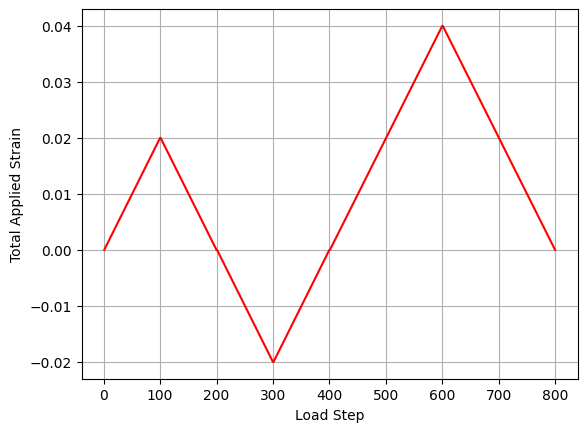

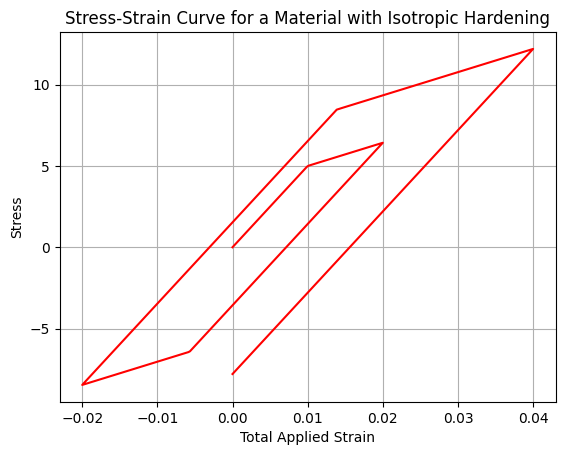

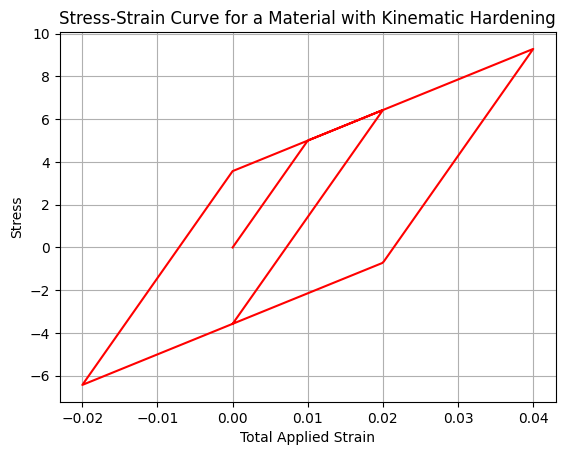

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from elastoplasticity import elasto_plasticity as ep

E, H, Y= 500, 200, 5
Y0 = Y
ep_iso = ep.ElastoPlasticIsoHard( E, H, Y0)
ep_k = ep.ElastoPlasticKinematicHard( E, H, Y)
sigma0 = 0
epsilon_arr = np.concatenate( (np.linspace(0, 0.02, 100), np.linspace(0.02, 0, 100), np.linspace(0, -0.02, 100), np.linspace(-0.02, 0, 100), np.linspace(0, 0.04, 200), np.linspace(0.04, 0, 200)))

exmaple_number = 2
saved_figures_folder = ''
strain_fig_name_with_path = os.path.join( saved_figures_folder, f'strain_example{exmaple_number}.png' )
iso_fig_name_with_path = os.path.join( saved_figures_folder, f'isohardening_example{exmaple_number}.png' )
kinematic_fig_name_with_path = os.path.join( saved_figures_folder, f'kinematichardening_example{exmaple_number}.png' )

ep.plot_total_applied_strain( epsilon_arr, strain_fig_name_with_path)
ep_iso.plot_stress_strain_curve(epsilon_arr, sigma0, iso_fig_name_with_path)
ep_k.plot_stress_strain_curve(epsilon_arr, sigma0, kinematic_fig_name_with_path)

**Example 3**

The same as example one, but with a different strain array which consists of cycles of trapezoid like curves.

Note: chatGPT was used to generate the fucntion for the trapezoid_cycle cycle.

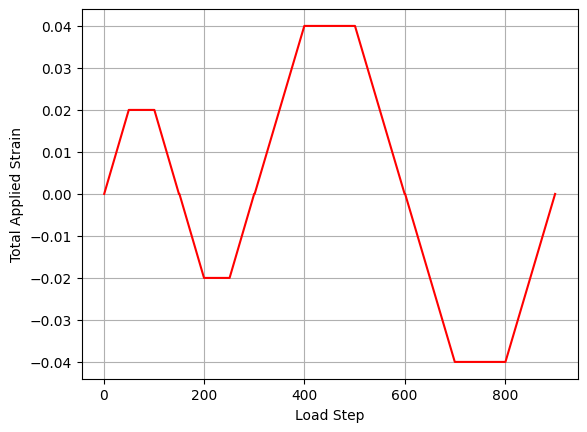

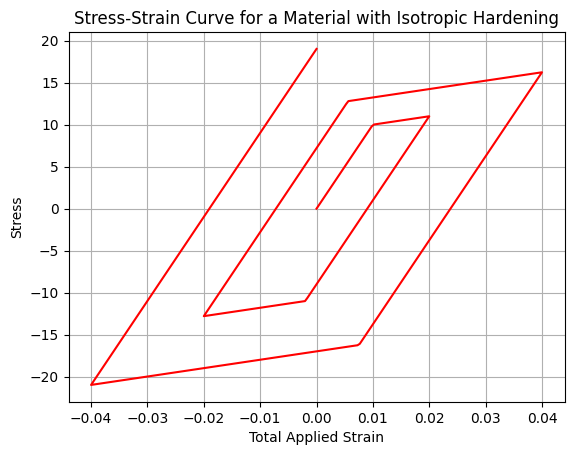

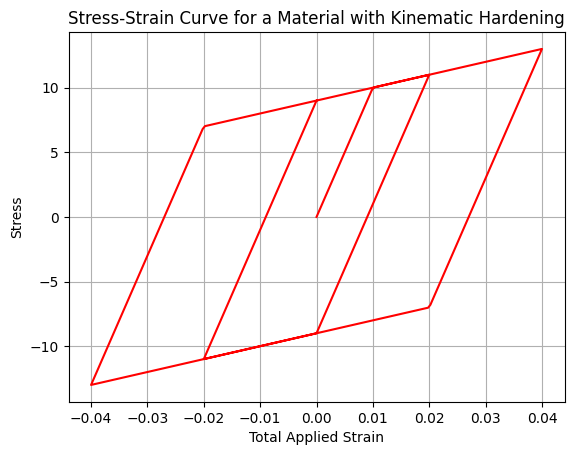

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from elastoplasticity import elasto_plasticity as ep

E, H, Y = 1000, 111, 10
Y0 = Y

ep_iso = ep.ElastoPlasticIsoHard(E, H, Y0)
ep_k = ep.ElastoPlasticKinematicHard(E, H, Y)
sigma0 = 0

# Define trapezoidal strain cycles with same slope
def trapezoid_cycle(peak_small, peak_large, slope=0.0004):
    """
    Creates a trapezoidal strain loading cycle where the loading/unloading slopes remain constant.

    peak_small: Magnitude of the first two trapezoidal peaks
    peak_large: Magnitude of the last two trapezoidal peaks
    slope: The strain increment per step to keep the rate constant
    """

    # Calculate the number of steps for each peak to maintain the same slope
    num_points_small = int(peak_small / slope)
    num_points_large = int(peak_large / slope)

    # Generate trapezoidal shapes with equal slopes
    def trapezoid(peak, num_points):
        up = np.linspace(0, peak, num_points)
        hold = np.full(num_points, peak)
        down = np.linspace(peak, 0, num_points)
        return np.concatenate([up, hold, down])

    # Create four trapezoidal cycles with alternating signs
    trapezoid1 = trapezoid(peak_small, num_points_small)
    trapezoid2 = trapezoid(-peak_small, num_points_small)
    trapezoid3 = trapezoid(peak_large, num_points_large)
    trapezoid4 = trapezoid(-peak_large, num_points_large)

    # Concatenate all cycles
    return np.concatenate([trapezoid1, trapezoid2, trapezoid3, trapezoid4])

# Define peak magnitudes
peak_small = 0.02  # First and second peaks
peak_large = 0.04  # Third and fourth peaks

# Generate the strain array with a consistent slope
epsilon_arr = trapezoid_cycle(peak_small, peak_large)

exmaple_number = 3
saved_figures_folder = ''
strain_fig_name_with_path = os.path.join( saved_figures_folder, f'strain_example{exmaple_number}.png' )
iso_fig_name_with_path = os.path.join( saved_figures_folder, f'isohardening_example{exmaple_number}.png' )
kinematic_fig_name_with_path = os.path.join( saved_figures_folder, f'kinematichardening_example{exmaple_number}.png' )

ep.plot_total_applied_strain( epsilon_arr, strain_fig_name_with_path)
ep_iso.plot_stress_strain_curve(epsilon_arr, sigma0, iso_fig_name_with_path)
ep_k.plot_stress_strain_curve(epsilon_arr, sigma0, kinematic_fig_name_with_path)

**Example 4**  
The same as the last example but with different material properties.

Note: chatGPT was used to generate the fucntion for the trapezoid cycles.


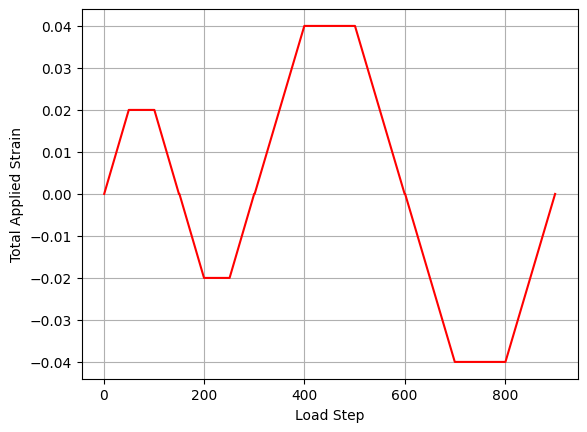

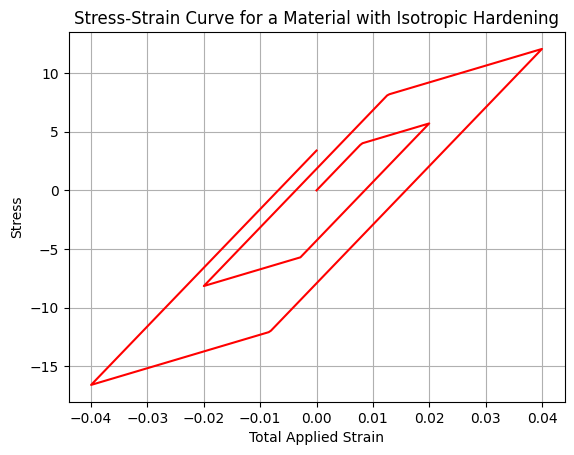

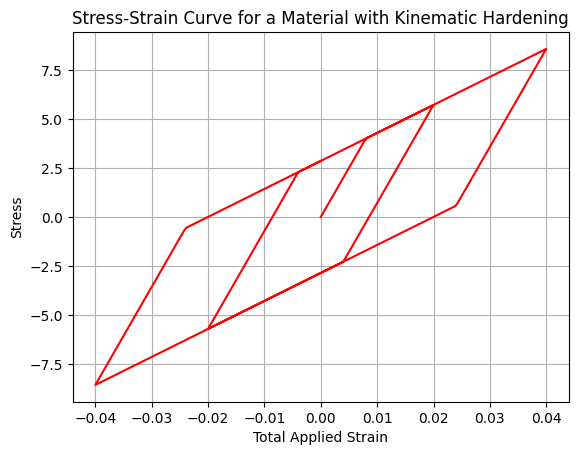

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from elastoplasticity import elasto_plasticity as ep

E, H, Y = 500, 200, 4
Y0 = Y

ep_iso = ep.ElastoPlasticIsoHard(E, H, Y0)
ep_k = ep.ElastoPlasticKinematicHard(E, H, Y)
sigma0 = 0

# Define trapezoidal strain cycles with same slope
def trapezoid_cycle(peak_small, peak_large, slope=0.0004):
    """
    Creates a trapezoidal strain loading cycle where the loading/unloading slopes remain constant.

    peak_small: Magnitude of the first two trapezoidal peaks
    peak_large: Magnitude of the last two trapezoidal peaks
    slope: The strain increment per step to keep the rate constant
    """

    # Calculate the number of steps for each peak to maintain the same slope
    num_points_small = int(peak_small / slope)
    num_points_large = int(peak_large / slope)

    # Generate trapezoidal shapes with equal slopes
    def trapezoid(peak, num_points):
        up = np.linspace(0, peak, num_points)
        hold = np.full(num_points, peak)
        down = np.linspace(peak, 0, num_points)
        return np.concatenate([up, hold, down])

    # Create four trapezoidal cycles with alternating signs
    trapezoid1 = trapezoid(peak_small, num_points_small)
    trapezoid2 = trapezoid(-peak_small, num_points_small)
    trapezoid3 = trapezoid(peak_large, num_points_large)
    trapezoid4 = trapezoid(-peak_large, num_points_large)

    # Concatenate all cycles
    return np.concatenate([trapezoid1, trapezoid2, trapezoid3, trapezoid4])

# Define peak magnitudes
peak_small = 0.02  # First and second peaks
peak_large = 0.04  # Third and fourth peaks

# Generate the strain array with a consistent slope
epsilon_arr = trapezoid_cycle(peak_small, peak_large)

exmaple_number = 4
saved_figures_folder = ''
strain_fig_name_with_path = os.path.join( saved_figures_folder, f'strain_example{exmaple_number}.png' )
iso_fig_name_with_path = os.path.join( saved_figures_folder, f'isohardening_example{exmaple_number}.png' )
kinematic_fig_name_with_path = os.path.join( saved_figures_folder, f'kinematichardening_example{exmaple_number}.png' )

ep.plot_total_applied_strain( epsilon_arr, strain_fig_name_with_path)
ep_iso.plot_stress_strain_curve(epsilon_arr, sigma0, iso_fig_name_with_path)
ep_k.plot_stress_strain_curve(epsilon_arr, sigma0, kinematic_fig_name_with_path)


**Example 5**  
The same as example one, but with a different strain array which consists of half circle cycles.

Note: chatGPT was used to generate the fucntion for the half_circle_cycle.

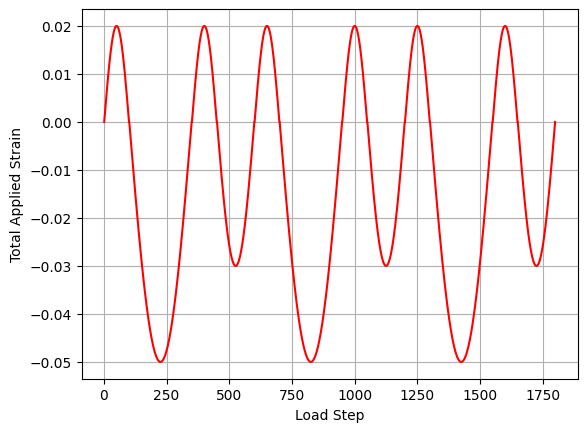

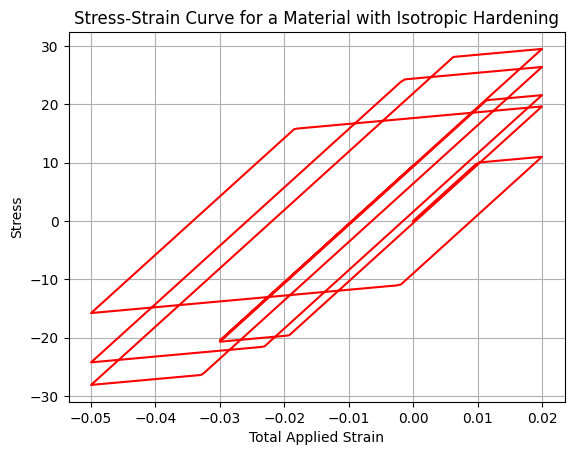

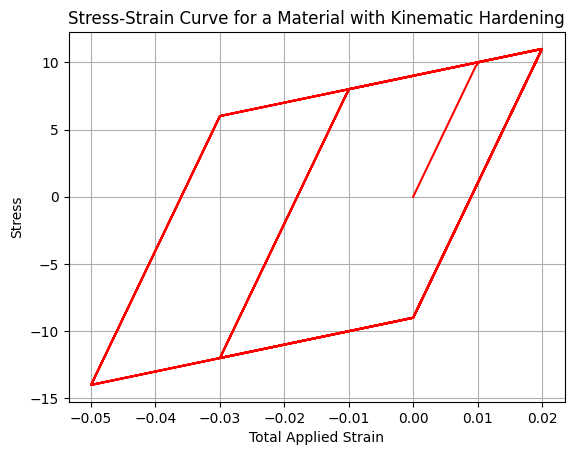

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from elastoplasticity import elasto_plasticity as ep

E, H, Y = 1000, 111, 10
Y0 = Y

# Initialize elasto-plastic models
ep_iso = ep.ElastoPlasticIsoHard(E, H, Y0)
ep_k = ep.ElastoPlasticKinematicHard(E, H, Y)
sigma0 = 0

# Define function to generate smooth half-circle cycles with variable period
def half_circle_cycle(peak1, peak2, peak3, base_points=100, repeat=3):
    """
    Creates a smooth cyclic strain path using half circles (sinusoidal segments),
    with periods adjusted proportionally to the peak values. The cycle is repeated.

    peak1: Magnitude of the 1st and 3rd peaks (positive, small)
    peak2: Magnitude of the 2nd peak (largest, negative)
    peak3: Magnitude of the 4th peak (medium, negative)
    base_points: Number of points for the smallest peak (others scale accordingly)
    repeat: Number of times to repeat the cycle
    """
    # Define the number of points proportional to peak strain values
    num_points1 = int(base_points * (peak1 / peak1))  # 1st peak (reference size)
    num_points2 = int(base_points * (peak2 / peak1))  # 2nd peak (bigger, longer duration)
    num_points3 = int(base_points * (peak1 / peak1))  # 3rd peak (same as 1st)
    num_points4 = int(base_points * (peak3 / peak1))  # 4th peak (medium)

    # Generate theta values for sine wave (half-circle shape)
    theta1 = np.linspace(0, np.pi, num_points1)
    theta2 = np.linspace(0, np.pi, num_points2)
    theta3 = np.linspace(0, np.pi, num_points3)
    theta4 = np.linspace(0, np.pi, num_points4)

    # Create half-circle strain cycles
    half1 = peak1 * np.sin(theta1)  # First half-circle (positive)
    half2 = -peak2 * np.sin(theta2) # Second half-circle (largest, negative)
    half3 = peak1 * np.sin(theta3)  # Third half-circle (same as first, positive)
    half4 = -peak3 * np.sin(theta4) # Fourth half-circle (negative, medium)

    # One full cycle
    single_cycle = np.concatenate([half1, half2, half3, half4])

    # Repeat the cycle
    return np.tile(single_cycle, repeat)

# Define peak magnitudes
peak_small = 0.02  # 1st and 3rd peaks (small, positive)
peak_large = 0.05  # 2nd peak (largest, negative)
peak_medium = 0.03  # 4th peak (medium, negative)

# Generate the strain array with proportional periods and repetition
epsilon_arr = half_circle_cycle(peak_small, peak_large, peak_medium, base_points=100, repeat=3)

exmaple_number = 5
saved_figures_folder = ''
strain_fig_name_with_path = os.path.join( saved_figures_folder, f'strain_example{exmaple_number}.png' )
iso_fig_name_with_path = os.path.join( saved_figures_folder, f'isohardening_example{exmaple_number}.png' )
kinematic_fig_name_with_path = os.path.join( saved_figures_folder, f'kinematichardening_example{exmaple_number}.png' )

ep.plot_total_applied_strain( epsilon_arr, strain_fig_name_with_path)
ep_iso.plot_stress_strain_curve(epsilon_arr, sigma0, iso_fig_name_with_path)
ep_k.plot_stress_strain_curve(epsilon_arr, sigma0, kinematic_fig_name_with_path)


**Example 6**


The same as the previous example but with different material properties.

Note: chatGPT was used to generate the fucntion for the half_circle_cycle.

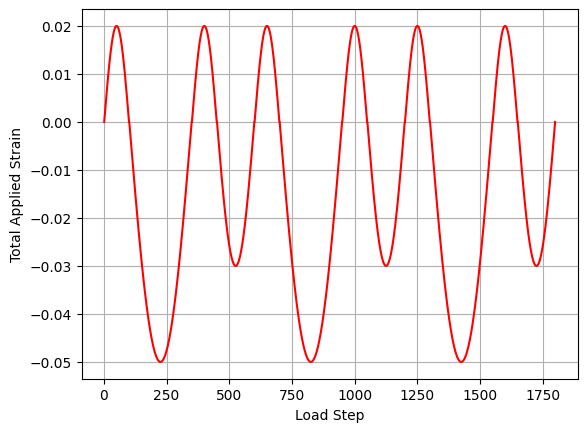

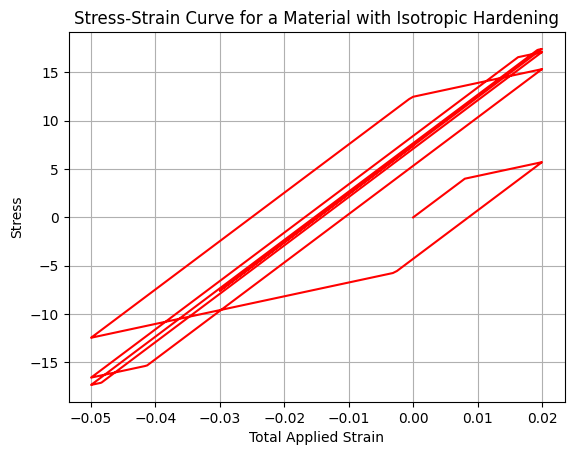

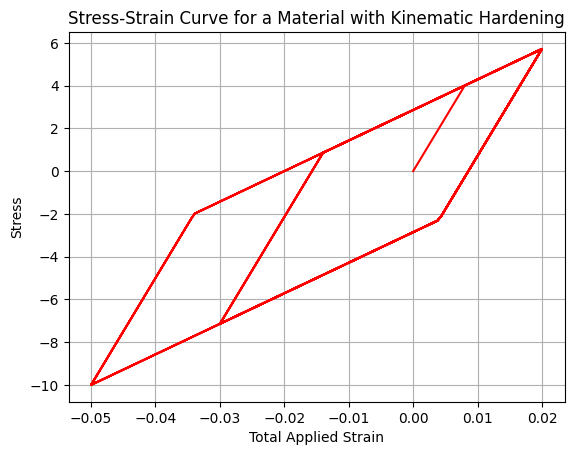

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from elastoplasticity import elasto_plasticity as ep

E, H, Y = 500, 200, 4
Y0 = Y

# Initialize elasto-plastic models
ep_iso = ep.ElastoPlasticIsoHard(E, H, Y0)
ep_k = ep.ElastoPlasticKinematicHard(E, H, Y)
sigma0 = 0

# Define function to generate smooth half-circle cycles with variable period
def half_circle_cycle(peak1, peak2, peak3, base_points=100, repeat=3):
    """
    Creates a smooth cyclic strain path using half circles (sinusoidal segments),
    with periods adjusted proportionally to the peak values. The cycle is repeated.

    peak1: Magnitude of the 1st and 3rd peaks (positive, small)
    peak2: Magnitude of the 2nd peak (largest, negative)
    peak3: Magnitude of the 4th peak (medium, negative)
    base_points: Number of points for the smallest peak (others scale accordingly)
    repeat: Number of times to repeat the cycle
    """
    # Define the number of points proportional to peak strain values
    num_points1 = int(base_points * (peak1 / peak1))  # 1st peak (reference size)
    num_points2 = int(base_points * (peak2 / peak1))  # 2nd peak (bigger, longer duration)
    num_points3 = int(base_points * (peak1 / peak1))  # 3rd peak (same as 1st)
    num_points4 = int(base_points * (peak3 / peak1))  # 4th peak (medium)

    # Generate theta values for sine wave (half-circle shape)
    theta1 = np.linspace(0, np.pi, num_points1)
    theta2 = np.linspace(0, np.pi, num_points2)
    theta3 = np.linspace(0, np.pi, num_points3)
    theta4 = np.linspace(0, np.pi, num_points4)

    # Create half-circle strain cycles
    half1 = peak1 * np.sin(theta1)  # First half-circle (positive)
    half2 = -peak2 * np.sin(theta2) # Second half-circle (largest, negative)
    half3 = peak1 * np.sin(theta3)  # Third half-circle (same as first, positive)
    half4 = -peak3 * np.sin(theta4) # Fourth half-circle (negative, medium)

    # One full cycle
    single_cycle = np.concatenate([half1, half2, half3, half4])

    # Repeat the cycle
    return np.tile(single_cycle, repeat)

# Define peak magnitudes
peak_small = 0.02  # 1st and 3rd peaks (small, positive)
peak_large = 0.05  # 2nd peak (largest, negative)
peak_medium = 0.03  # 4th peak (medium, negative)

# Generate the strain array with proportional periods and repetition
epsilon_arr = half_circle_cycle(peak_small, peak_large, peak_medium, base_points=100, repeat=3)

exmaple_number = 6
saved_figures_folder = ''
strain_fig_name_with_path = os.path.join( saved_figures_folder, f'strain_example{exmaple_number}.png' )
iso_fig_name_with_path = os.path.join( saved_figures_folder, f'isohardening_example{exmaple_number}.png' )
kinematic_fig_name_with_path = os.path.join( saved_figures_folder, f'kinematichardening_example{exmaple_number}.png' )

ep.plot_total_applied_strain( epsilon_arr, strain_fig_name_with_path)
ep_iso.plot_stress_strain_curve(epsilon_arr, sigma0, iso_fig_name_with_path)
ep_k.plot_stress_strain_curve(epsilon_arr, sigma0, kinematic_fig_name_with_path)
